In [70]:
import pandas as pd

df_train = pd.read_csv('/content/sample_data/train.csv')
print('\n------------df_train 先頭10行------------')
print(df_train.head(10))


------------df_train 先頭10行------------
   id  age     sex        bmi  children smoker     region  charges
0   0   26    male  32.665465         3     no  southeast        0
1   1   41    male  29.798725         1     no  southwest        0
2   2   28    male  32.722029         0    yes  northwest        1
3   3   20  female  38.429831         2     no  southeast        0
4   4   45  female  29.641854         1     no  northwest        0
5   5   20    male  37.785937         2    yes  southeast        1
6   6   37    male  43.393374         2     no  northeast        0
7   7   41  female  32.280407         1     no  northeast        0
8   8   40    male  28.865828         1     no  northeast        0
9   9   54  female  33.870887         2     no  northeast        0


In [71]:
df_train = df_train.drop('id', axis = 1)
print("\n------------'id'カラム削除　先頭5行------------")
print(df_train.head())


------------'id'カラム削除------------
   age     sex        bmi  children smoker     region  charges
0   26    male  32.665465         3     no  southeast        0
1   41    male  29.798725         1     no  southwest        0
2   28    male  32.722029         0    yes  northwest        1
3   20  female  38.429831         2     no  southeast        0
4   45  female  29.641854         1     no  northwest        0


In [72]:
print('\n------------df_train 基本統計量-----------')
print(df_train.describe())
print('\n')
print('\n---df_train データ数---')
print(f'行 × 列：{df_train.shape}')
print('\n---df_train データ形式---')
print(type(df_train))
print('\n')


------------df_train 基本統計量-----------
               age          bmi     children      charges
count  1600.000000  1600.000000  1600.000000  1600.000000
mean     38.985000    32.424376     1.014375     0.306250
std      13.555012     5.766915     1.259031     0.628656
min      18.000000    20.627626     0.000000     0.000000
25%      27.000000    28.634267     0.000000     0.000000
50%      40.000000    32.268786     1.000000     0.000000
75%      50.000000    37.069581     2.000000     0.000000
max      64.000000    47.290644     5.000000     2.000000



------------df_train データ数------------
行 × 列：(1600, 7)



------------df_train データ数------------
<class 'pandas.core.frame.DataFrame'>




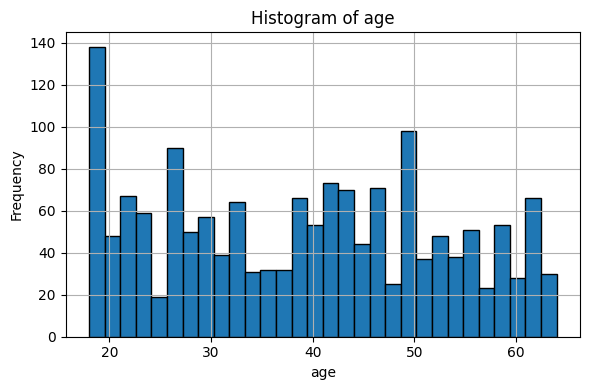

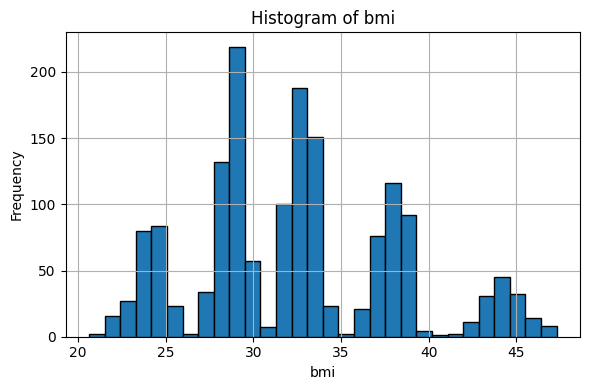

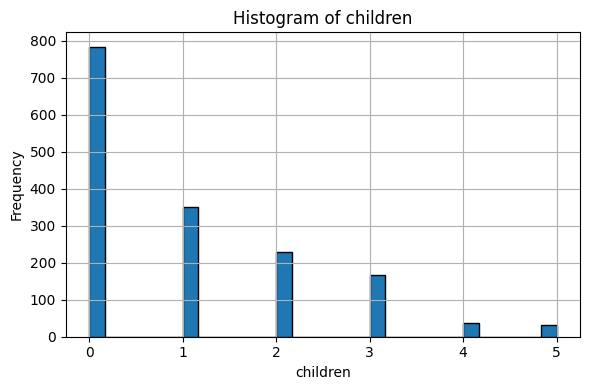

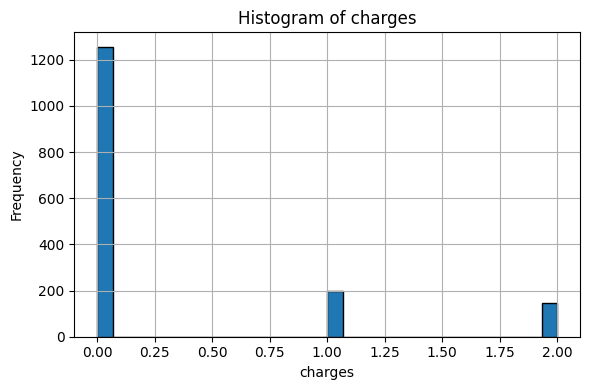

In [73]:
import matplotlib.pyplot as plt

def plot_histograms(x):
    numeric_cols = x.select_dtypes(include = 'number').columns
    for col in numeric_cols:
        plt.figure(figsize = (6, 4))
        x[col].hist(bins = 30, edgecolor = 'black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_histograms(df_train)

In [74]:
def sex_judgement(x):
  if x == 'male':
    return 1
  else:
    return 0
df_train['sex'] = df_train['sex'].apply(sex_judgement)

def smoker_judgement(x):
  if x == 'yes':
    return 1
  else:
    return 0
df_train['smoker'] = df_train['smoker'].apply(smoker_judgement)

dummies_region = pd.get_dummies(df_train['region'], prefix = 'region').astype(int)
df_train = pd.concat([df_train.drop('region', axis = 1), dummies_region], axis = 1)

print('\n------------df_train 前処理済　先頭5行------------')
print(df_train.head())
print('\n')


------------df_train 前処理済------------
   age  sex        bmi  children  smoker  charges  region_northeast  \
0   26    1  32.665465         3       0        0                 0   
1   41    1  29.798725         1       0        0                 0   
2   28    1  32.722029         0       1        1                 0   
3   20    0  38.429831         2       0        0                 0   
4   45    0  29.641854         1       0        0                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 1                 0  
1                 0                 0                 1  
2                 1                 0                 0  
3                 0                 1                 0  
4                 1                 0                 0  




In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

train_X = df_train.drop('charges', axis = 1)
train_y = df_train['charges']

X_tr, X_val, y_tr, y_val = train_test_split(train_X, train_y, test_size = 0.3, random_state = 1)
print('\n----------訓練データ----------')
print(f'X_tr：{X_tr.shape}　y_tr：{y_tr.shape}')
print('\n----------検証データ----------')
print(f'X_val：{X_val.shape}　y_val：{y_val.shape}')
print('\n')

scaled = ['age', 'bmi']
scaler = StandardScaler()
X_tr_scaled = X_tr.copy()
X_tr_scaled[scaled] = scaler.fit_transform(X_tr[scaled])
X_val_scaled = X_val.copy()
X_val_scaled[scaled] = scaler.transform(X_val[scaled])
print('\n------------X_tr　標準化済　基本統計量------------')
print(X_tr_scaled.describe())
print('\n')
print('\n------------X_val　標準化済　基本統計量------------')
print(X_val_scaled.describe())
print('\n')

sm_tr = SMOTE(sampling_strategy = 'not majority', random_state = 1)
X_tr_resampled, y_tr_resampled = sm_tr.fit_resample(X_tr, y_tr)

sm_val = SMOTE(sampling_strategy = 'not majority', random_state = 1)
X_val_resampled, y_val_resampled = sm_val.fit_resample(X_val, y_val)

sm_tr_scaled = SMOTE(sampling_strategy = 'not majority', random_state = 1)
X_tr_scaled_resampled, y_tr_scaled_resampled = sm_tr_scaled.fit_resample(X_tr_scaled, y_tr)

print('\n---スケーリング済データ---')
print(f'X_tr_resampled{X_tr_resampled.shape}, y_tr_resampled{y_tr_resampled.shape}')
print('\n---スケーリング & 標準化済データ---')
print(f'X_tr_scaled_resampled{X_tr_scaled_resampled.shape}, y_tr_resampled{y_tr_resampled.shape}')
print('\n')


----------訓練データ----------
X_tr：(1120, 9)　y_tr：(1120,)

----------検証データ----------
X_val：(480, 9)　y_val：(480,)



------------X_tr　標準化済------------
                age          sex           bmi     children       smoker  \
count  1.120000e+03  1120.000000  1.120000e+03  1120.000000  1120.000000   
mean   1.776357e-16     0.516071 -9.769963e-16     0.967857     0.219643   
std    1.000447e+00     0.499965  1.000447e+00     1.227785     0.414190   
min   -1.557985e+00     0.000000 -2.023151e+00     0.000000     0.000000   
25%   -8.951527e-01     0.000000 -6.502331e-01     0.000000     0.000000   
50%    6.227206e-02     1.000000 -2.046991e-02     0.500000     0.000000   
75%    7.987527e-01     1.000000  7.824419e-01     2.000000     0.000000   
max    1.829826e+00     1.000000  2.573627e+00     5.000000     1.000000   

       region_northeast  region_northwest  region_southeast  region_southwest  
count       1120.000000       1120.000000       1120.000000       1120.000000  
mean    

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_tr_scaled_resampled, y_tr_resampled)
y_pred_lr = model_lr.predict(X_val_scaled)
f1_macro_lr = f1_score(y_val, y_pred_lr, average = 'macro')

print('\n----ベースライン----')
print(f'F1 macro：{f1_macro_lr}')
print('\n')


----ベースライン----
LG F1 macro：0.714691867650244




In [77]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_svm = SVC(random_state=1)
model_svm.fit(X_tr_scaled_resampled, y_tr_scaled_resampled)
y_pred_svm = model_svm.predict(X_val_scaled)
f1_macro_svm = f1_score(y_val, y_pred_svm, average = 'macro')
print('\n---SVM---')
if f1_macro_svm > f1_macro_lr:
  print('Above baseline')
else:
  print('Below baseline')
print(f"F1 macro: {f1_macro_svm:.4f}")

model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_tr_resampled, y_tr_resampled)
y_pred_rf = model_rf.predict(X_val_resampled)
f1_macro_rf = f1_score(y_val_resampled, y_pred_rf, average = 'macro')
print('\n---Random Forest---')
if f1_macro_rf > f1_macro_lr:
  print('Above baseline')
else:
  print('Below baseline')
print(f"F1 macro: {f1_macro_rf:.4f}")

model_xgb = XGBClassifier(eval_metric = 'mlogloss', random_state = 1)
model_xgb.fit(X_tr_resampled, y_tr_resampled)
y_pred_xgb = model_xgb.predict(X_val_resampled)
f1_macro_xgb = f1_score(y_val_resampled, y_pred_xgb, average = 'macro')
print('\n---XGBoost---')
if f1_macro_xgb > f1_macro_lr:
  print('Above baseline')
else:
  print('Below baseline')
print(f"F1 macro: {f1_macro_xgb:.4f}")
print('\n')


---SVM---
Below baseline
F1 macro: 0.7120

---Random Forest---
Above baseline
F1 macro: 0.8363

---XGBoost---
Above baseline
F1 macro: 0.8202




In [116]:
df_test = pd.read_csv('/content/sample_data/test.csv')
print('\n------------df_test 先頭5行------------')
print(df_test.head())
print('\n')

ids = df_test['id']
df_test = df_test.drop('id', axis = 1)
df_test['sex'] = df_test['sex'].apply(sex_judgement)
df_test['smoker'] = df_test['smoker'].apply(smoker_judgement)
dummies_region_test = pd.get_dummies(df_test['region'], prefix = 'region').astype(int)
df_test = pd.concat([df_test.drop('region', axis = 1), dummies_region_test], axis = 1)
print('\n----df_test 前処理済　基本統計量----')
print(df_test.head())
print('\n')


------------df_test 先頭5行------------
   id  age     sex        bmi  children smoker     region
0  13   19    male  24.365178         1     no  northeast
1  23   59    male  33.997763         0    yes  northeast
2  27   42  female  29.283450         0     no  southwest
3  28   30    male  24.903725         1     no  northwest
4  29   41  female  29.644536         0     no  southwest



----df_test 前処理済----
   age  sex        bmi  children  smoker  region_northeast  region_northwest  \
0   19    1  24.365178         1       0                 1                 0   
1   59    1  33.997763         0       1                 1                 0   
2   42    0  29.283450         0       0                 0                 0   
3   30    1  24.903725         1       0                 0                 1   
4   41    0  29.644536         0       0                 0                 0   

   region_southeast  region_southwest  
0                 0                 0  
1                 0          

In [119]:
df_test_pred = model_rf.predict(df_test)
submission = pd.DataFrame({'id': ids, 'predicted_label':  df_test_pred})
submission.to_csv('sample_submit.csv', index = False, header = False)

print('\nデータエクスポート完了')
print('\n')


データエクスポート完了


